In [2]:
from featurewiz import FeatureWiz

Imported lazytransform v1.9. 

Imported featurewiz 0.5.1. Use the following syntax:
    >>> wiz = FeatureWiz(feature_engg = '', nrows=None, transform_target=True, scalers="std",
        		category_encoders="auto", add_missing=False, verbose=0. imbalanced=False,
        		ae_options={})
    >>> X_train_selected, y_train = wiz.fit_transform(X_train, y_train)
    >>> X_test_selected = wiz.transform(X_test)
    >>> selected_features = wiz.features
    


In [ ]:
from featurewiz import FeatureWiz
fwiz = FeatureWiz(feature_engg = '', nrows=None, transform_target=True, scalers="std",
        		category_encoders="auto", add_missing=False, verbose=0, imbalanced=False, 
                ae_options={})
X_train_selected, y_train = fwiz.fit_transform(X_train, y_train)
X_test_selected = fwiz.transform(X_test)
### get list of selected features ###
fwiz.features  

In [1]:
from feature_selector import FeatureSelector
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

/Users/salma/anaconda3/envs/tensor/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(


In [2]:
data = pd.read_csv('data/gene_expression_processed.csv')

In [8]:
data

Subject_ID  Diagnosis  Sex   Age  APOE      MMSE  0..gjSdbqnr.rUSTBI  \
0     DCR00001          0    0  80.0     0  0.700000            0.088795   
1     DCR00004          1    1  78.0     1  0.900000            0.181352   
2     DCR00009          2    0  69.0     2  1.000000            0.234806   
3     DCR00013          2    1  82.0     2  1.000000            0.200211   
4     DCR00014          2    0  75.0     3  1.000000            0.298697   
..         ...        ...  ...   ...   ...       ...                 ...   
686  TLSMCI607          1    0  72.0     2  0.966667            0.880989   
687  TLSMCI608          1    1  73.0     2  0.933333            0.563331   
688  TLSMCI609          1    0  63.0     2  0.933333            0.391704   
689  TLSMCI611          1    0  78.0     2  1.000000            0.170520   
690  TLSMCI612          1    0  79.0     2  0.933333            0.581331   

     0.PRu.vXrqQjlN4p9I  00K3OeGXV631V5_6eA  00buPhOysV5Rpc5VF4  ...  \
0              0.273127            0.193529            0.309962  ...   
1              0.348891            0.219264            0.238711  ...   
2              0.286395            0.209287            0.274571  ...   
3              0.198895            0.176699            0.486266  ...   
4              0.231180            0.239486            0.355490  ...   
..                  ...                 ...                 ...  ...   
686            0.743075            0.891960            0.765542  ...   
687            0.733671            0.848955            0.912413  ...   
688            0.375203            0.135714            0.120642  ...   
689            0.291315            0.302720            0.409110  ...   
690            0.900801            0.944117            0.969853  ...   

     xu.S6OENiSSCDruXFc  xu3n8ix_RpCpNPRKhc  xuBm5ckgidWRNTl.gQ  \
0              0.250205            0.534043            0.228336   
1              0.207464            0.398372            0.096881   
2              0.375221            0.460183            0.199774   
3              0.231453            0.601386            0.359547   
4              0.182504            0.470885            0.193513   
..                  ...                 ...                 ...   
686            0.761720            0.770549            0.833409   
687            0.818221            0.934123            0.566105   
688            0.286690            0.304781            0.333597   
689            0.317898            0.466010            0.286327   
690            0.758126            0.879841            0.503186   

     xuNOUeR1JerhIuIV7c  xud4v2r3nXECBua55o  xvHfVEL1fC35XJ7neU  \
0              0.333964            0.193588            0.061668   
1              0.260605            0.087100            0.199851   
2              0.260712            0.303891            0.223674   
3              0.262099            0.110664            0.379809   
4              0.410749            0.385892            0.162825   
..                  ...                 ...                 ...   
686            0.821333            0.828432            0.896655   
687            0.800043            0.711198            0.689489   
688            0.295981            0.310110            0.179890   
689            0.481435            0.408931            0.365906   
690            0.808005            0.779681            0.763102   

     xve7nuGHtAizelOmhE  xvrrv4q_nIDgJej.uU  xws9e3UChad1OnXmXY  \
0              0.054195            0.239990            0.324222   
1              0.222749            0.394825            0.246103   
2              0.172455            0.419673            0.158987   
3              0.197126            0.268046            0.290488   
4              0.150648            0.157329            0.206321   
..                  ...                 ...                 ...   
686            0.780041            0.398491            0.926660   
687            0.733125            0.688211            0.743123   
688          

In [9]:
train = pd.read_csv('data/gene_expression_processed.csv')
train_labels = train['Diagnosis']
train = train.drop(columns = ['Diagnosis','Subject_ID'])

In [10]:
fs = FeatureSelector(data = train, labels = train_labels)

### Remove Multi-colinear Features

In [ ]:
fs.identify_collinear(correlation_threshold=0.975)

In [ ]:
correlated_features = fs.ops['collinear']
correlated_features[:10]

['P02775',
 'P63000',
 'P28482',
 'P05067',
 'P25098',
 'P08631',
 'Q06124',
 'Q9UHD2',
 'Q9Y3C8',
 'Q06187']

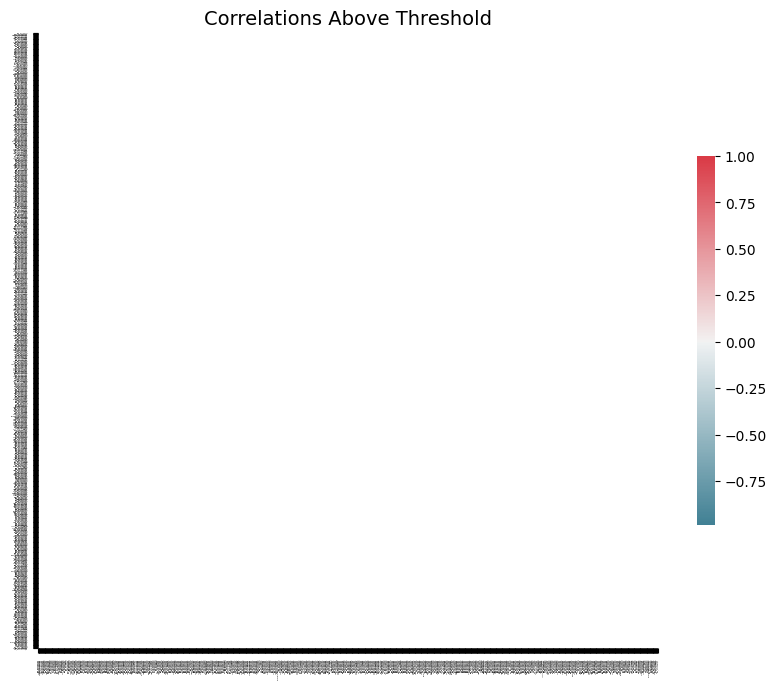

In [ ]:
fs.plot_collinear()

In [ ]:
fs.record_collinear

drop_feature        corr_feature  corr_value
0                  P02775              P02776    0.984144
1                  P63000              P07900    0.983700
2                  P28482              P07900    0.977297
3                  P28482              P27361    0.976031
4                  P28482              P63000    0.980359
...                   ...                 ...         ...
27657  rKUJDqnoRCtrpUAIuc  KH4VogVRgNOQNCK9Q0    0.979042
27658  rKUJDqnoRCtrpUAIuc  TkruZKUJLqnoRCtrpU    0.993883
27659  rinfSvdd7T2tJbdLU8  930r3Xe09rSW3S1P5o    0.982483
27660  ua7eec91ifZDllwoYQ  rKea7eecd1ifZDllQo    0.981900
27661  xlBPS3rO4pubgkIHXo  Zsj56XvsrrKhEjhYXo    0.981615

[27662 rows x 3 columns]

### Zero Important Features

In [ ]:
fs.identify_zero_importance(task = 'classification', eval_metric = 'accuracy', n_iterations = 10)

Training Gradient Boosting Model

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028794 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799297
[LightGBM] [Info] Number of data points in the train set: 190, number of used features: 12585
[LightGBM] [Info] Start training from score -1.072637
[LightGBM] [Info] Start training from score -1.136150
[LightGBM] [Info] Start training from score -1.088141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [ ]:
one_hot_features = fs.one_hot_features
base_features = fs.base_features
print('There are %d original features' % len(base_features))
print('There are %d one-hot features' % len(one_hot_features))

There are 12597 original features
There are 1379 one-hot features


In [ ]:
zero_importance_features = fs.ops['zero_importance']
zero_importance_features[:5]

['TR7dIiv9e52V793Sgk',
 'TR57FSOXEFNXlExK50',
 'TPXO9LJuvjnPvyX1XU',
 'QsAeo_hLLrk3rX5ZeI',
 'QrxUd7UdUynEgAtEJk']

In [ ]:
#drop the zero importance features
train_no_collinear_no_zero_importance = fs.remove(methods = ['zero_importance', 'collinear'])

Removed 12029 features.


In [ ]:
train_no_collinear_no_zero_importance

PC3      PC4      PC5      PC6      PC7      PC8      PC9     PC10  \
0    -0.0204  -0.0074   0,0001  -0.0461   0,0009     0.01   0.0586  -0.0916   
1    -0.0142  -0.0051  -0.0112  -0.0254  -0.0219   0.0795   0.0101  -0.0264   
2    -0.0158  -0.0242  -0.0319   0.0826  -0.0668  -0.0357  -0.1104   0.0882   
3       13.0       33  -0.0256   0.1634   0.0757  -0.0284   0.1533   0.0535   
4    -0.0082  -0.0145   0.0316  -0.0482   0.0442   0.0257  -0.1075   0.0047   
..       ...      ...      ...      ...      ...      ...      ...      ...   
185   0.0049   0.0054   0.0016   0,0009  -0.0398      -18   0.0117   0.0275   
186   0.0108   0.0147   0.0025   0.0036  -0.0193   0.0043  -0.0102   0.0068   
187   0.0058   0.0225   0.0092  -0.0363  -0.0032   0.0126  -0.0011  -0.0138   
188  -0.0044     -2.0   0.0141  -0.0033  -0.0299  -0.0281   0.0392   0.0293   
189   0.0126   0.0303   0.0014       -4      -12  -0.0313  -0.0067  -0.0019   

       Q9Y4X3    P39905  ...  xnrnj5EYbo1TYnr7fc  xoaLvFbgVI0Ug8LlYE  \
0    0.260586  0.260425  ...            0.910579            0.875621   
1    0.054808  0.322485  ...            0.756518            0.626279   
2    0.182127  0.259932  ...            0.621109            0.699633   
3    0.145164  0.311496  ...            0.708734            0.704729   
4    0.150545  0.478022  ...            0.571194            0.566182   
..        ...       ...  ...                 ...                 ...   
185  0.160742  0.431460  ...            0.661363            0.699762   
186  0.186376  0.235066  ...            0.638598            0.779950   
187  0.202804  0.213511  ...            0.779609            0.720413   
188  0.225747  0.262750  ...            0.621171            0.630965   
189  0.184960  0.365596  ...            0.775064            0.629687   

     xochUjffiKUjnUuXjo  xp0UixUgg0s6DyKEuk  xpTRqDotTnICJ0u_p4  \
0              0.470650            0.669403            0.843961   
1              0.432139            0.437783            0.620359   
2              0.338722            0.498183            0.614640   
3              0.531315            0.503205            0.579868   
4              0.418018            0.127754            0.677958   
..                  ...                 ...                 ...   
185            0.467396            0.496683            0.803323   
186            0.584614            0.724808            0.721423   
187            0.621327            0.558812            0.862207   
188            0.378768            0.523281            0.710837   
189            0.512593            0.397848            0.864396   

     xqAt4uAo6XT3f3Dfno  xreslBB_kH1HX3RduI  xtPfn5H1XPhE4Ce764  \
0              0.828015            0.793067            0.934274   
1              0.546195            0.886404            0.817802   
2              0.818662            0.936088            0.944987   
3              0.690076            0.803162            0.892283   
4              0.543519            0.939704            0.839134   
..                  ...                 ...                 ...   
185            0.821295            0.641017            0.720384   
186            0.589330            0.729978            0.501098   
187            0.785431            0.671192            0.933365   
188            0.842943            0.631842            0.644941   
189            0.837682            0.655072            0.709973   

     xvrrv4q_nIDgJej.uU  xz1S1tKD.sgqfTuesU  
0              0.607193            0.833734  
1              0.759021            0.542998  
2              1.000000            0.388760  
3              0.853226            0.657866  
4              0.898484            0.637025  
..                  ...                 ...  
185            0.507369            0.705117  
186            0.515005            0.520334  
187            0.633924            0.630178  
188            0.549367            0.653483  
189            0.510799            0.750686  

[190 rows x 1926 columns]

### Feature Importance

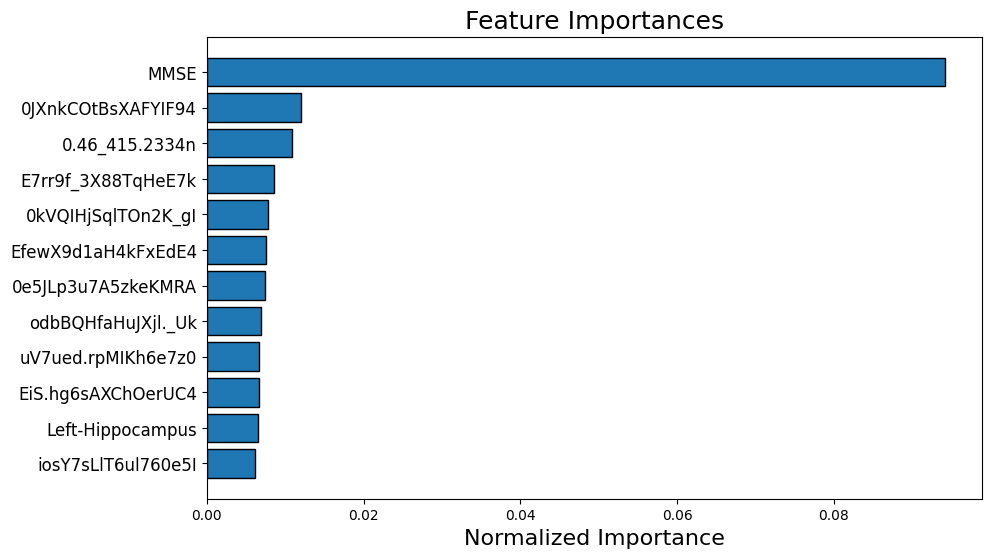

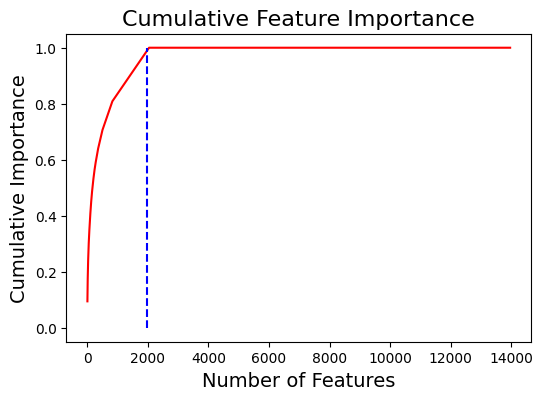

1971 features required for 0.99 of cumulative importance


In [ ]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

In [ ]:
fs.feature_importances.head(10)

feature  importance  normalized_importance  \
0                MMSE       595.0               0.094190   
1  0JXnkCOtBsXAFYIF94        76.0               0.012031   
2      0.46_415.2334n        69.0               0.010923   
3  E7rr9f_3X88TqHeE7k        54.0               0.008548   
4  0kVQIHjSqlTOn2K_gI        49.0               0.007757   
5  EfewX9d1aH4kFxEdE4        48.0               0.007599   
6  0e5JLp3u7A5zkeKMRA        47.0               0.007440   
7  odbBQHfaHuJXjl._Uk        44.0               0.006965   
8  uV7ued.rpMIKh6e7z0        42.0               0.006649   
9  EiS.hg6sAXChOerUC4        42.0               0.006649   

   cumulative_importance  
0               0.094190  
1               0.106221  
2               0.117144  
3               0.125693  
4               0.133449  
5               0.141048  
6               0.148488  
7               0.155454  
8               0.162102  
9               0.168751

In [ ]:
fs.identify_low_importance(cumulative_importance = 0.99)

1970 features required for cumulative importance of 0.99 after one hot encoding.
11998 features do not contribute to cumulative importance of 0.99.



In [ ]:
low_importance_features = fs.ops['low_importance']
low_importance_features[:5]

['6.54_812.9738m/z', 'P02751.2', '10.70_883.9613m/z', 'Q92876', 'Q92563']

In [ ]:
train_removed_all = fs.remove(methods = 'all', keep_one_hot=False)

['collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 12087 features including one-hot features.


In [ ]:
train_removed_all['Subject_ID'] = data['Subject_ID']
train_removed_all['Diagnosis'] = train_labels

In [ ]:
train_removed_all.to_csv('data/gene_expression_fs.csv', index = False)

In [ ]:
train_removed_all

PC3      PC4      PC5      PC6      PC7      PC8      PC9     PC10  \
0    -0.0204  -0.0074   0,0001  -0.0461   0,0009     0.01   0.0586  -0.0916   
1    -0.0142  -0.0051  -0.0112  -0.0254  -0.0219   0.0795   0.0101  -0.0264   
2    -0.0158  -0.0242  -0.0319   0.0826  -0.0668  -0.0357  -0.1104   0.0882   
3       13.0       33  -0.0256   0.1634   0.0757  -0.0284   0.1533   0.0535   
4    -0.0082  -0.0145   0.0316  -0.0482   0.0442   0.0257  -0.1075   0.0047   
..       ...      ...      ...      ...      ...      ...      ...      ...   
185   0.0049   0.0054   0.0016   0,0009  -0.0398      -18   0.0117   0.0275   
186   0.0108   0.0147   0.0025   0.0036  -0.0193   0.0043  -0.0102   0.0068   
187   0.0058   0.0225   0.0092  -0.0363  -0.0032   0.0126  -0.0011  -0.0138   
188  -0.0044     -2.0   0.0141  -0.0033  -0.0299  -0.0281   0.0392   0.0293   
189   0.0126   0.0303   0.0014       -4      -12  -0.0313  -0.0067  -0.0019   

       Q9Y4X3    P39905  ...  xochUjffiKUjnUuXjo  xp0UixUgg0s6DyKEuk  \
0    0.260586  0.260425  ...            0.470650            0.669403   
1    0.054808  0.322485  ...            0.432139            0.437783   
2    0.182127  0.259932  ...            0.338722            0.498183   
3    0.145164  0.311496  ...            0.531315            0.503205   
4    0.150545  0.478022  ...            0.418018            0.127754   
..        ...       ...  ...                 ...                 ...   
185  0.160742  0.431460  ...            0.467396            0.496683   
186  0.186376  0.235066  ...            0.584614            0.724808   
187  0.202804  0.213511  ...            0.621327            0.558812   
188  0.225747  0.262750  ...            0.378768            0.523281   
189  0.184960  0.365596  ...            0.512593            0.397848   

     xpTRqDotTnICJ0u_p4  xqAt4uAo6XT3f3Dfno  xreslBB_kH1HX3RduI  \
0              0.843961            0.828015            0.793067   
1              0.620359            0.546195            0.886404   
2              0.614640            0.818662            0.936088   
3              0.579868            0.690076            0.803162   
4              0.677958            0.543519            0.939704   
..                  ...                 ...                 ...   
185            0.803323            0.821295            0.641017   
186            0.721423            0.589330            0.729978   
187            0.862207            0.785431            0.671192   
188            0.710837            0.842943            0.631842   
189            0.864396            0.837682            0.655072   

     xtPfn5H1XPhE4Ce764  xvrrv4q_nIDgJej.uU  xz1S1tKD.sgqfTuesU  Subject_ID  \
0              0.934274            0.607193            0.833734   KPOADC002   
1              0.817802            0.759021            0.542998   KPOADC006   
2              0.944987            1.000000            0.388760   KPOADC007   
3              0.892283            0.853226            0.657866   KPOADC008   
4              0.839134            0.898484            0.637025   KPOADC013   
..                  ...                 ...                 ...         ...   
185            0.720384            0.507369            0.705117   THSMCI016   
186            0.501098            0.515005            0.520334   THSMCI017   
187            0.933365            0.633924            0.630178   THSMCI060   
188            0.644941            0.549367            0.653483   THSMCI064   
189            0.709973            0.510799            0.750686   THSMCI065   

     Diagnosis  
0            0  
1            0  
2            0  
3            0  
4            0  
..         ...  
185          2  
186          2  
187          2  
188          2  
189          2  

[190 rows x 1870 columns]